# Insurance 
## Linear Regression
<!--  -->
**Project Contenet**
<li><a href='#intro'>Introduction</a></li>
<li><a href='#wrang'>Data Wranglling</a></li>
<li><a href='#eda'>Exploratory Data Analysis</a></li>
<li><a href='#mch'>Machine Learning Engineer</a></li>
<li><a href='#conc'>Conclusion</a></li>

<a id='intro'></a>
## Introduction

dataset contain 7 features:

age.
sex
bmI:Body Mass Index.
children.
smoker.
region.
charges.

**Project Goal**
Apply a full data science process on medical assurance data including full data analysis and ML to predict medical assurance charges

### Basic Imports

In [6]:
import numpy as np
import pandas as pd
from IPython.display import display
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
sns.set_theme(rc={'figure.figsize':[10,5]},style='darkgrid',palette='flare',font_scale=1.2)

<a id='wrang'></a>
## Data Wranglling
Process contains 
<li><a href='#dc'>Data Discovery</a></li>
<li><a href='#clea'>Data Cleaning</a></li>
<li><a href='#vald'>Data Validating</a></li>

<a id='dc'></a>
## Data Discovery

In [7]:
def load_data(path):
    df = pd.read_csv(path)
    df.name = path.split('.')[0] 
    print(f'{df.name} dataset loaded successfuly')
    return df

In [8]:
df= load_data('insurance.csv')

insurance dataset loaded successfuly


In [9]:
def explore_data(df,num_row=5):
    print(f'{df.name} dataset contain {df.shape[0]} rows & {df.shape[1]} columns')
    print(f' Top {num_row} rows:')
    display(df.head(num_row))
    print('*'*50)
    print(f'Last {num_row} rows:')
    display(df.tail(num_row))

In [10]:
explore_data(df)

insurance dataset contain 1338 rows & 7 columns
 Top 5 rows:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**************************************************
Last 5 rows:


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [11]:
def data_type_missing(df):
    type_df = pd.DataFrame()
    type_df['features'] = df.columns
    type_df['first_val'] = pd.Series([df[col][0] for col in df.columns])
    type_df.set_index('features',inplace=True)
    type_df['dtype'] = df.dtypes
    type_df['count_missing'] = df.isna().sum()
    type_df['missing_%'] = df.isna().sum() / df.shape[0] * 100
    display(type_df)
    print('*'*50)
    print(df.info())

In [12]:
data_type_missing(df)

,first_val,dtype,count_missing,missing_%
features,,,,
age,19,int64,0,0.0
sex,female,object,0,0.0
bmi,27.9,float64,0,0.0
children,0,int64,0,0.0
smoker,yes,object,0,0.0
region,southwest,object,0,0.0
charges,16884.924,float64,0,0.0


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [13]:
def quantitative_descriptive_stats(df):
    desc_df = df.describe()
    desc_df.loc['range'] = desc_df.loc['max'] -desc_df.loc['min']
    desc_df.loc['iqr'] = desc_df.loc['75%'] -desc_df.loc['25%']
    desc_df.loc['min_whisker'] = desc_df.loc['25%'] - 1.5 * desc_df.loc['iqr']
    desc_df.loc['max_whisker'] = desc_df.loc['75%'] + 1.5 * desc_df.loc['iqr']
    display(desc_df)
    for col in df.select_dtypes(include=['number']).columns:
        sns.boxplot(data=df,x=col)
        plt.title(f'{col} distribution')
        plt.show()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010
range,46.000000,37.170000,5.000000,62648.554110
iqr,24.000000,8.397500,2.000000,11899.625365


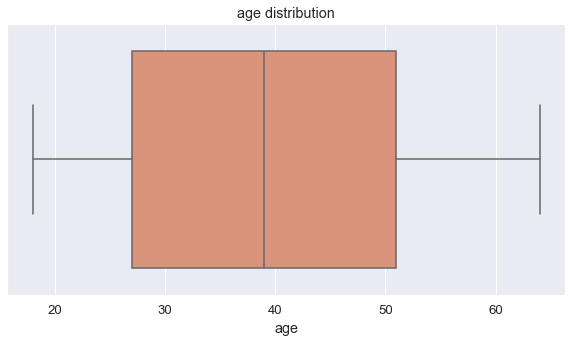

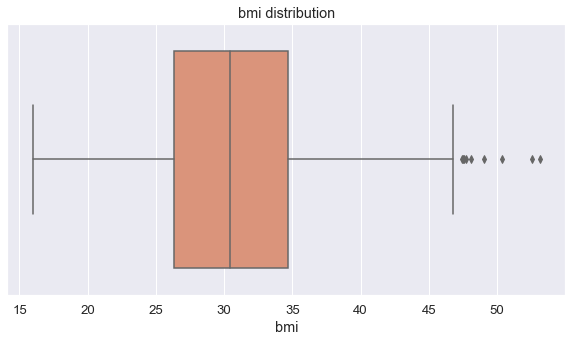

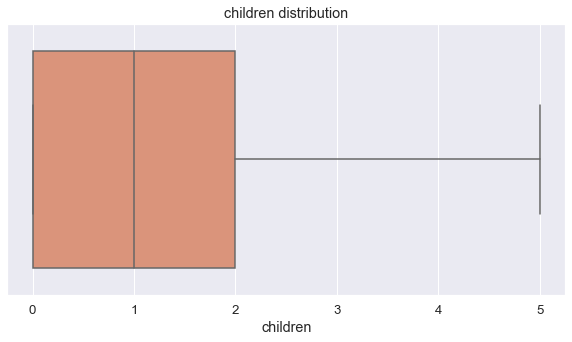

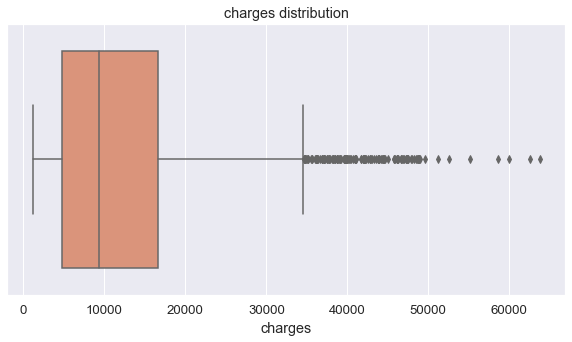

In [14]:
quantitative_descriptive_stats(df) 

In [15]:
def qualitative_decripitive_stats(df):
    display(df.describe(exclude=['number']))
    for col in df.select_dtypes(include=['O']).columns:
        print(f'{col} has {df[col].nunique()} unique values')
        if df[col].nunique()<=10:
            print(df[col].value_counts())
            sns.countplot(data=df,x=col)
            plt.title(f'{col} Frequency')
            plt.show()
            print("*"*50)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


sex has 2 unique values
male      676
female    662
Name: sex, dtype: int64


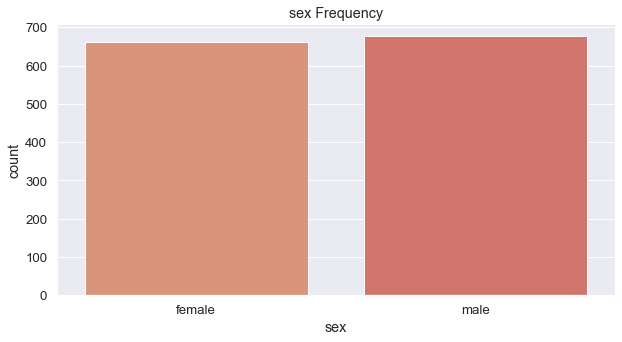

**************************************************
smoker has 2 unique values
no     1064
yes     274
Name: smoker, dtype: int64


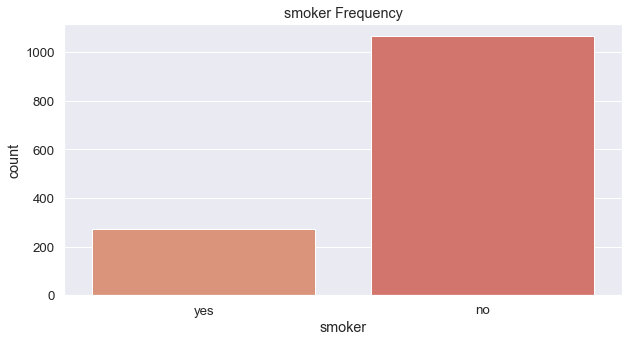

**************************************************
region has 4 unique values
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


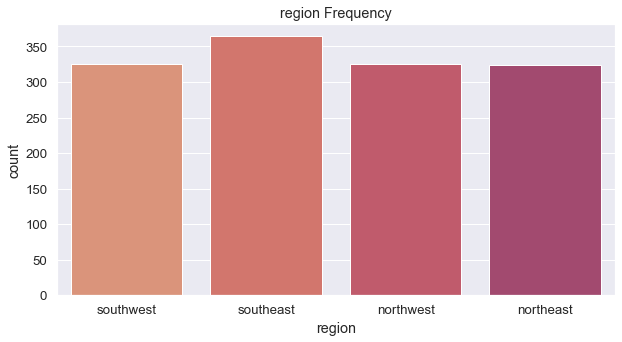

**************************************************


In [16]:
qualitative_decripitive_stats(df)

In [17]:
def duplicates(df):
    print(f'{df.name} has {df.duplicated().sum()} duplicated rows')
    if df.duplicated().sum() > 0:
        print('First duplicated')
        display(df[df.duplicated(keep='first')])
        print('*'*50)
        print('Last duplicated')
        display(df[df.duplicated(keep='last')])

In [18]:
duplicates(df)

insurance has 1 duplicated rows
First duplicated


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


**************************************************
Last duplicated


,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631


#### Finding:
* Insurance dataset contain 1338 rows & 7 columns. 
* Dataset has the right features datatypes & it contains quantitative & qualitative vaiables.
* Dataset doesn't contain any missing values. 
* Dataset has 1 duplicated row.
* Dataset has outliers on bmi & charges will handle them later. 

<a id='clea'></a>
#### Data Cleaning
**Drop Duplicated row**

In [19]:
df.drop_duplicates(inplace=True)

<a id='vald'></a>
#### Data Validating

In [20]:
duplicates(df)

insurance has 0 duplicated rows


In [21]:
explore_data(df)

insurance dataset contain 1337 rows & 7 columns
 Top 5 rows:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**************************************************
Last 5 rows:


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


* Dataset is ready now for analysis. 

<a id='eda'></a>
## Exploratory Data Analysis
<li><a href='#uni'>Univariate Analysis</a></li>
<li><a href='#bi'>Bivariate Analysis</a></li>
<li><a href='#multi'>multivariate Analysis</a></li>

<a id='uni'></a>
#### Univariate Analysis
#### Quantitative Continues Variable 

In [22]:
def quantit_uni(df,col):
    fig, (ax1, ax2) = plt.subplots(2)
    ax1 = sns.histplot(data= df,x=col,ax=ax1)
    ax2 = sns.boxplot(data=df,x=col,ax=ax2)
    fig.suptitle(f'{col} Distribution')
    plt.show()
    display(df[col].describe())


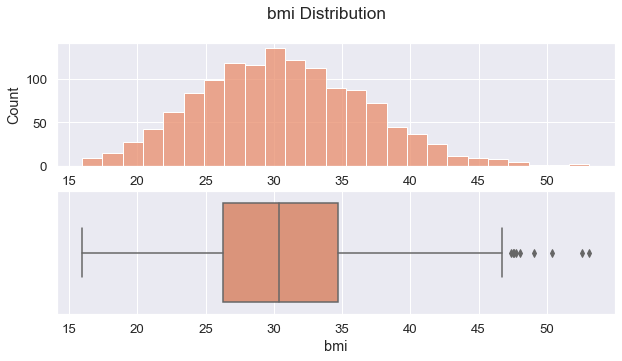

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [23]:
quantit_uni(df,'bmi')

* bmi has normal distribution with mean 30.66 & stdandrd deviation 6.10
* 75% of the data have bmi 34.7 while 90% of the data has the range from (13.7 to 47.29) & only 5% of the data is greater than 47.29 with maximum  53.13 appear as maximum outliers. 

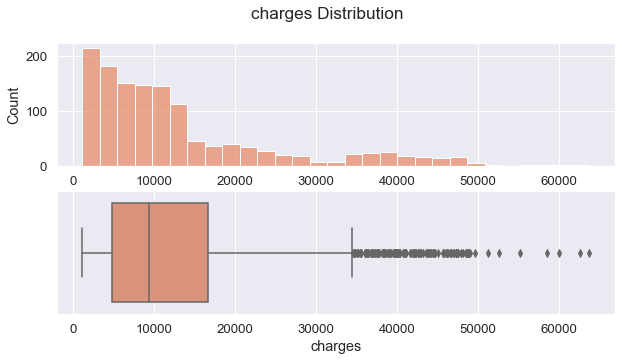

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [24]:
quantit_uni(df,'charges')

* charges has right skewed distribution with mean 13279.12 & stdandrd deviation 12110.36 which indicated that data has a huge disperession
* 25% of the vahrges has value 4746.34, 50% of the data has charges 9386.16 & 75% of the data 16657.71.
* 90% of the data is within range (-13109.15,34489.35) while 5% of the data is greater than 34489.35 with maximum 63770.42 appear as outliers.

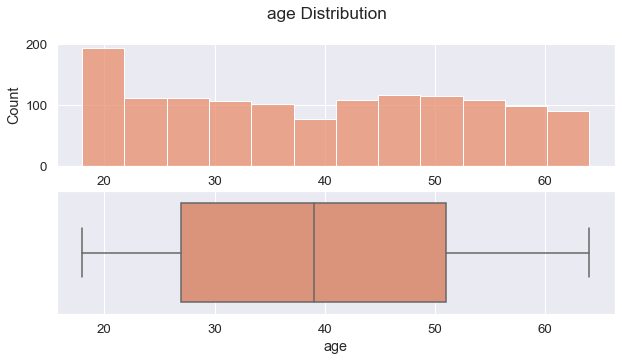

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [25]:
quantit_uni(df,'age')

* Data is unimodal it has one one mode on 18 except that it has  almost a uniform distribution with mean 39.22 and standard deviation 14.04 with no ouliers.

In [26]:
def discrete_uni(df,col):
    fig, (ax1, ax2) = plt.subplots(2)
    ax1 = sns.countplot(data= df,x=col,ax=ax1)
    ax2 = sns.boxplot(data=df,x=col,ax=ax2)
    fig.suptitle(f'{col} Distribution')
    plt.show()
    display(df[col].describe())


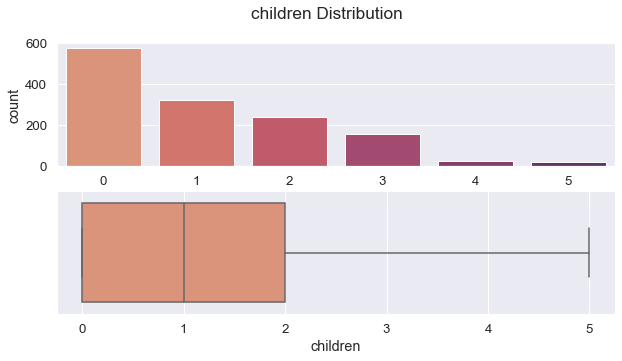

count    1337.000000
mean        1.095737
std         1.205571
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [27]:
discrete_uni(df,'children')

* Children has a unimodal with value 0 & mean 1 with no ouliers & the maximum is 5

#### Qualitative univariate analysis

In [28]:
def qualitative_uni(df):
    for col in df.select_dtypes(include=['O']).columns:
        print(f'{col} has {df[col].nunique()} unique values')
        if df[col].nunique()<=10:
            print(df[col].value_counts())
            sns.countplot(data=df,x=col)
            plt.title(f'{col} Frequency')
            plt.show()
            print("*"*50)

sex has 2 unique values
male      675
female    662
Name: sex, dtype: int64


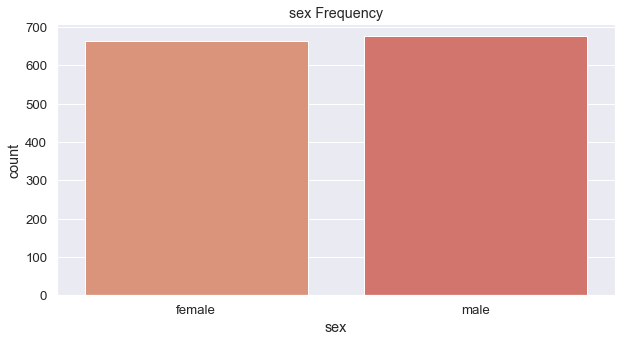

**************************************************
smoker has 2 unique values
no     1063
yes     274
Name: smoker, dtype: int64


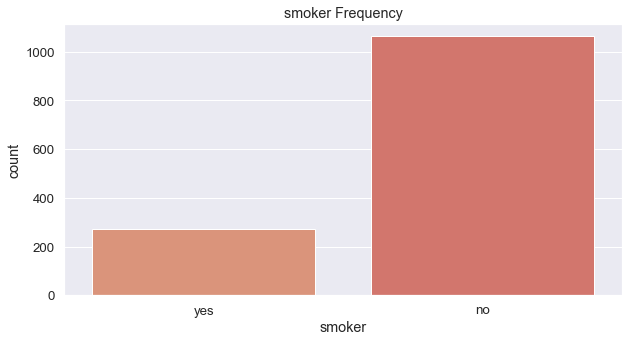

**************************************************
region has 4 unique values
southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


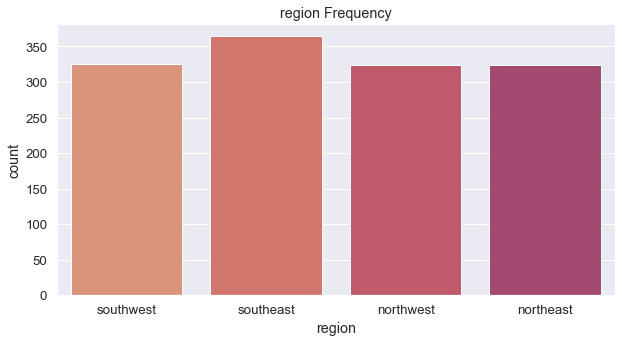

**************************************************


In [29]:
qualitative_uni(df)

* sex has 2 unique values & it almost has a uniform distribution. 
* smoker has 2 unique values & it's a unimodal with value no smoker. 
* region has 4 unique values & hardly we can say it has a unimodal with value southeast. 

### Explore Outliers

In [30]:
outliers = df.loc[detect_outliers(df,0,['charges'])]
outliers

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


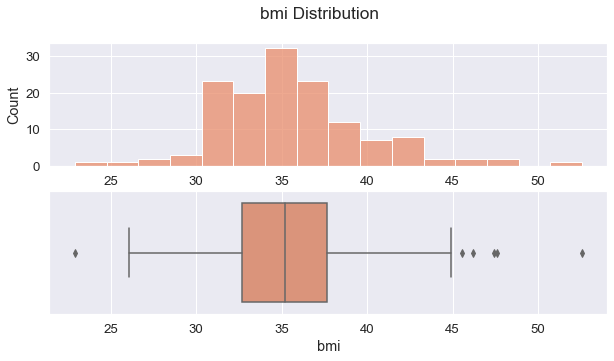

count    139.000000
mean      35.564604
std        4.434917
min       22.895000
25%       32.667500
50%       35.200000
75%       37.660000
max       52.580000
Name: bmi, dtype: float64

In [31]:
quantit_uni(outliers,'bmi')

* in charges outliers data bmi hardly has normal distribution with mean 35.56 & stdandrd deviation 4.43.
* 75% of the data have bmi 37.66 while 90% of the data has the range from (26 to 45).

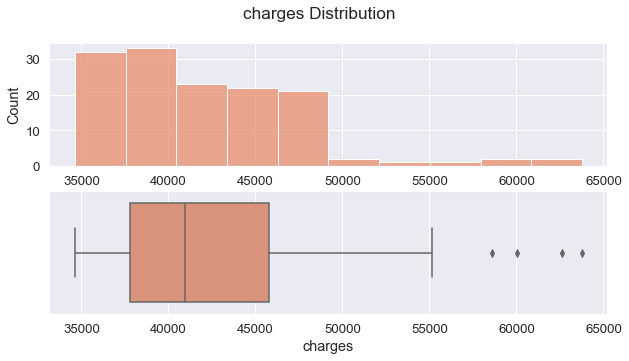

count      139.000000
mean     42103.947206
std       5582.168107
min      34617.840650
25%      37786.149950
50%      40974.164900
75%      45786.706425
max      63770.428010
Name: charges, dtype: float64

In [32]:
quantit_uni(outliers,'charges')

* charges has right skewed distribution with mean 42103.95 & stdandrd deviation 5582.17 which indicated that data has a huge disperession
* 25% of the vahrges has value 37786.14, 50% of the data has charges 40974.16 & 75% of the data 45786.70.

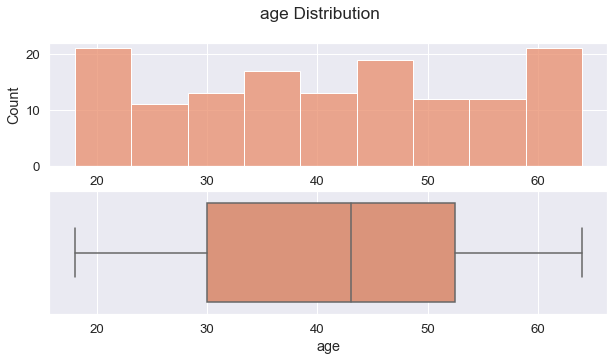

count    139.000000
mean      41.079137
std       13.801420
min       18.000000
25%       30.000000
50%       43.000000
75%       52.500000
max       64.000000
Name: age, dtype: float64

In [33]:
quantit_uni(outliers,'age')

* Data is bimodal it has one two mode on 19 & 64.

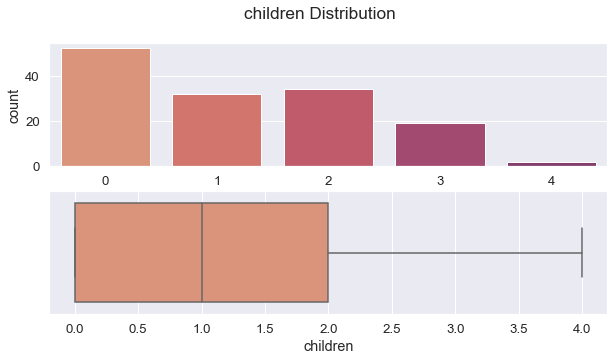

count    139.000000
mean       1.187050
std        1.126546
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: children, dtype: float64

In [34]:
discrete_uni(outliers,'children')

* Children has a unimodal with value 0 & mean 1 with no ouliers & the maximum is 4

#### Qualitative univariate analysis

sex has 2 unique values
male      89
female    50
Name: sex, dtype: int64


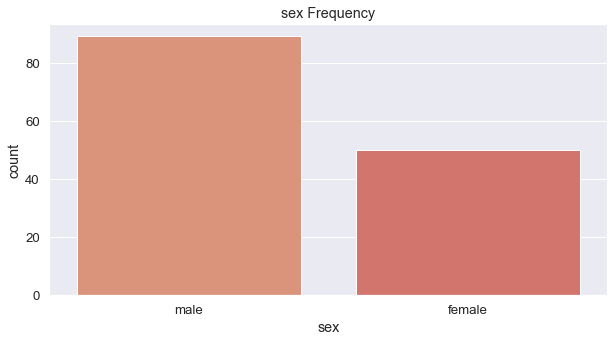

**************************************************
smoker has 2 unique values
yes    136
no       3
Name: smoker, dtype: int64


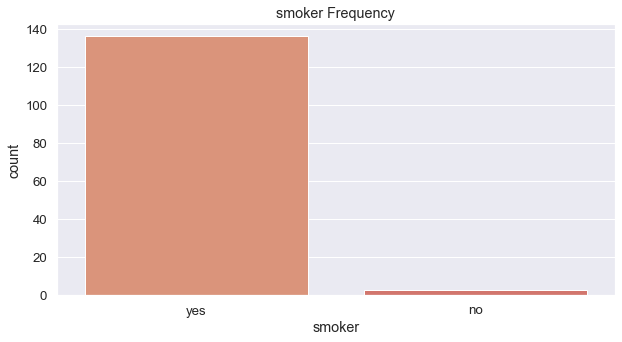

**************************************************
region has 4 unique values
southeast    57
southwest    34
northeast    28
northwest    20
Name: region, dtype: int64


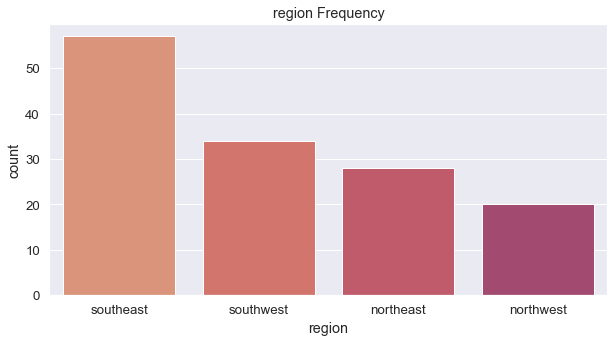

**************************************************


In [35]:
qualitative_uni(outliers)

* sex has 2 unique values & it's a unimodal with value male. 
* smoker has 2 unique values & it's a unimodal with value smoker. 
* region has 4 unique values & easily we can say it has a unimodal with value southeast.

* we will cut 5% of the maximum & minimum values of caharges & compelete our analysis on that approach even on prediction & will see the result how it would be.

In [36]:
clean = df[(df['charges'] >= -13109) & (df['charges'] <=34490) ]
clean.size

8386

<a id='bi'></a>
## Bivariate Analysis

**Two quantitaive variable**

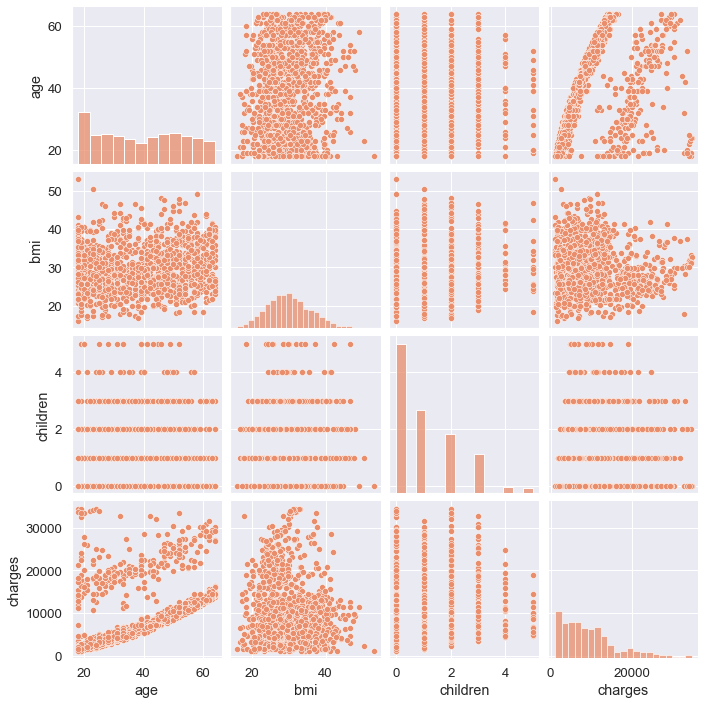

In [37]:
sns.pairplot(clean)

<AxesSubplot:>

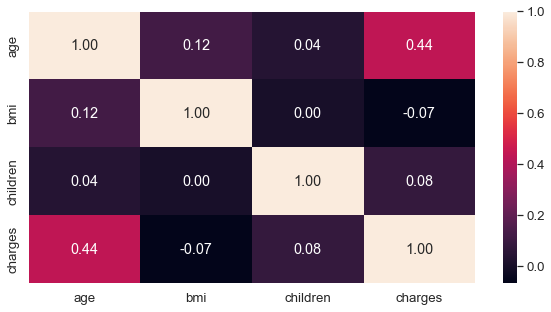

In [38]:
sns.heatmap(clean.corr(),annot=True,fmt='0.2f')

* it appear that age have a meduim positive correlation with charges, while bmi has a slight negative effect on charges & children has slight positive correlation on it.

**one quantitaive & one qualitative**

In [39]:
clean.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

**charges vs sex**

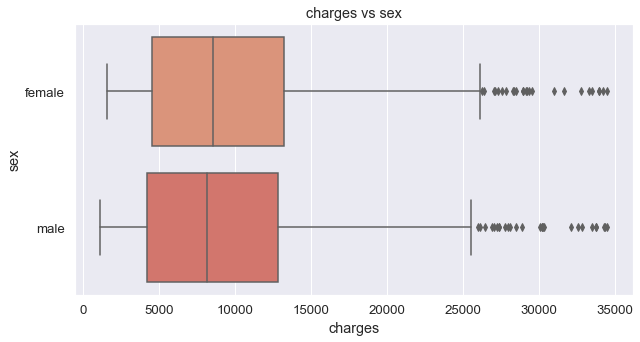

In [40]:
sns.boxplot(data=clean,x='charges',y='sex')
plt.title("charges vs sex")
plt.show()

In [41]:
sex_charges = clean.groupby('sex').describe()['charges']
display(sex_charges)

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,612.0,10100.424469,7091.124221,1607.5101,4569.607650,8538.979725,13207.487863,34439.8559
male,586.0,9761.564831,7394.812682,1121.8739,4237.818075,8144.250375,12807.383187,34472.8410


* from graph above we can find that male has little more variation the female due to charges also both of them is positively skewed.
* Male & female is positively skewed also both of them has outliers
* female 50% of the data has range (4885,14454) while male (4654,19006). 

**bmi vs sex**

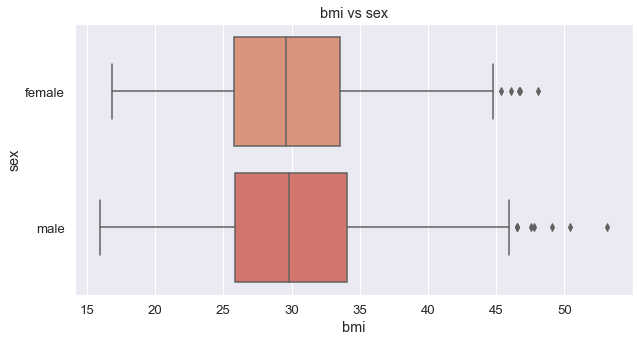

In [42]:
sns.boxplot(data=clean,x='bmi',y='sex')
plt.title("bmi vs sex")
plt.show()

In [43]:
sex_bmi = clean.groupby('sex').describe()['bmi']
display(sex_bmi)

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,612.0,29.934167,5.945334,16.815,25.78625,29.59,33.55875,48.07
male,586.0,30.262534,6.083505,15.960,25.84000,29.83,34.07750,53.13


* from graph above we can find that male & female almost have same variation due to bmi, also both of them is positively skewed.
* Male & female is positively skewed also both of them has outliers
* female 50% of the data has range (26,34) while male (26,35) alomst has same range of data. 

**age vs sex**

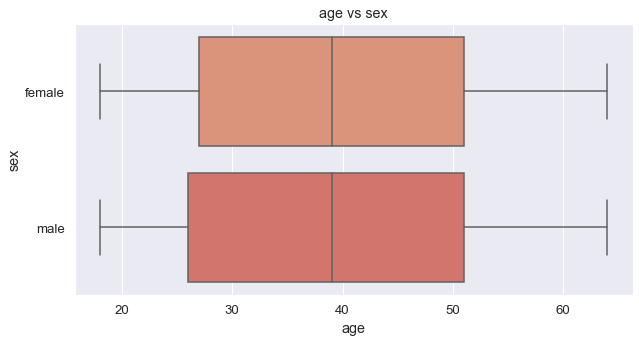

In [44]:
sns.boxplot(data=clean,x='age',y='sex')
plt.title("age vs sex")
plt.show()

In [45]:
sex_age = clean.groupby('sex').describe()['age']
display(sex_age)

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,612.0,39.28268,14.052631,18.0,27.0,39.0,51.0,64.0
male,586.0,38.71843,14.078081,18.0,26.0,39.0,51.0,64.0


* from graph above we can find that male & female have same variation due to ages male are negatively skewed while female positively skewed.
* both of them has no outliers
* female 50% of the data has range (27,51) while male (26,51) alomst has same range of data. 

**cahrges vs smoker**

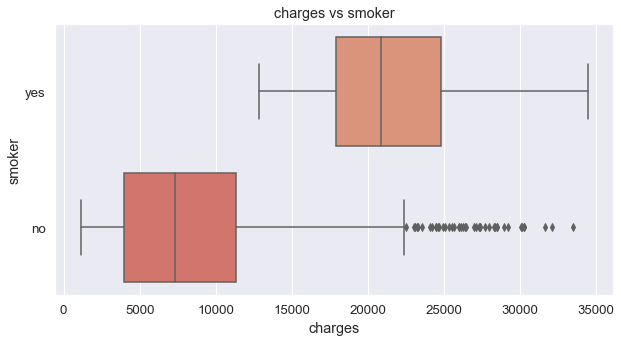

In [46]:
sns.boxplot(data=clean,x='charges',y='smoker')
plt.title("charges vs smoker")
plt.show()

In [47]:
smoker_charges = clean.groupby('smoker').describe()['charges']
display(smoker_charges)

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1060.0,8362.048001,5815.843466,1121.8739,3986.438700,7341.416000,11354.085925,33471.97189
yes,138.0,22014.245543,5517.072699,12829.4551,17913.921787,20878.860675,24819.232350,34472.84100


* from graph above we can find that non smoker has more variation on charges than smoker charges.
* non smoker has outliers in charges while smoker doesn't. 
* smoker is negatively skewed while non smoker positively skewed
* from above we can indicates that smoker has more charges than non smoker. 

**bmi vs smoker**

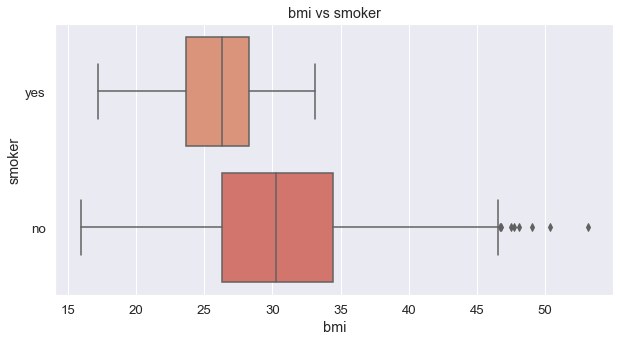

In [48]:
sns.boxplot(data=clean,x='bmi',y='smoker')
plt.title("bmi vs smoker")
plt.show()

In [49]:
smoker_bmi = clean.groupby('smoker').describe()['bmi']
display(smoker_bmi)

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1060.0,30.649047,6.051454,15.960,26.315,30.305,34.4300,53.13
yes,138.0,25.837428,3.493473,17.195,23.655,26.345,28.3075,33.11


* from graph above we can find that almost have same variation.
* non smoker has outliers in bmi while smoker doesn't. 
* both of them are positively skewed due to bmi.
* from above we can indicates that smoker has less bmi than non smoker. 

**age vs smoker**

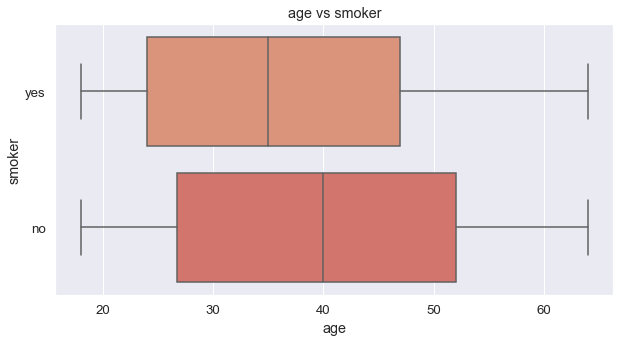

In [50]:
sns.boxplot(data=clean,x='age',y='smoker')
plt.title("age vs smoker")
plt.show()

In [51]:
smoker_age = clean.groupby('smoker').describe()['age']
display(smoker_age)

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1060.0,39.350943,14.059279,18.0,26.75,40.0,52.0,64.0
yes,138.0,36.362319,13.850053,18.0,24.00,35.0,47.0,64.0


* from graph above we can find that smoker & non smoker almost have same variation due to age with no outliers on both.
* smoker is positively skewed while non smoker is negatively skewed to age.
* smoker & non smoker almost has the same range due to ages with min 18 & max 64. 

**charges vs region**

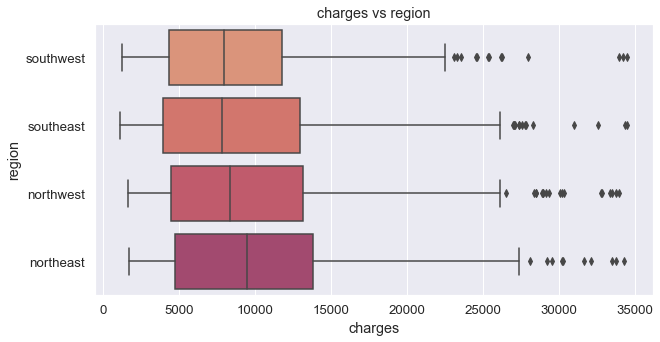

In [52]:
sns.boxplot(data=clean,x='charges',y='region')
plt.title("charges vs region")
plt.show()

In [53]:
region_charges = clean.groupby('region').describe()['charges']
display(region_charges)

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,296.0,10736.262980,7312.717872,1694.7964,4719.193925,9440.087825,13804.51815,34254.05335
northwest,304.0,10392.290654,7723.833721,1621.3402,4465.646500,8360.443000,13172.47855,33907.54800
southeast,307.0,9574.280940,7403.579116,1121.8739,3941.296500,7804.160500,12927.33855,34439.85590
southwest,291.0,9021.451259,6320.958743,1241.5650,4326.198000,7954.517000,11789.44300,34472.84100


* from graph above we can find that northeast & northwest almost have same variation due to charges while the are less than southeast & southwest which are amlost equal.
* all region are is positively skewed.
* all region have outliers. 
* there are a little difference on ranges.

**bmi vs region**

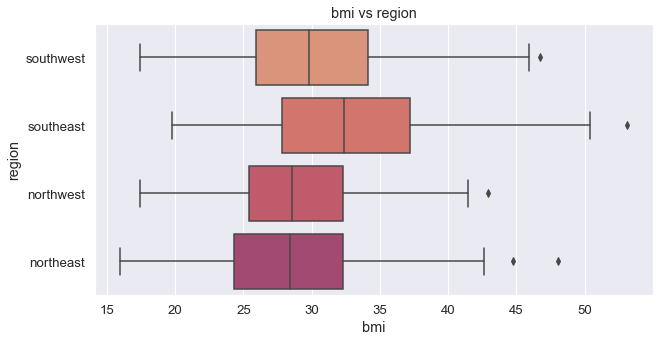

In [54]:
sns.boxplot(data=clean,x='bmi',y='region')
plt.title("bmi vs region")
plt.show()

In [55]:
region_bmi = clean.groupby('region').describe()['bmi']
display(region_bmi)

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,296.0,28.705726,5.875222,15.960,24.32000,28.4050,32.32375,48.07
northwest,304.0,28.865000,5.085994,17.385,25.43625,28.5475,32.30000,42.94
southeast,307.0,32.605863,6.469974,19.800,27.83000,32.3400,37.18000,53.13
southwest,291.0,30.143299,5.718148,17.400,25.90000,29.8000,34.10000,46.70


* from graph above we can find that all region have same variation due to bmi.
* all region are is positively skewed.
* all region have outliers. 
* there are a little difference on ranges.

**age vs region**

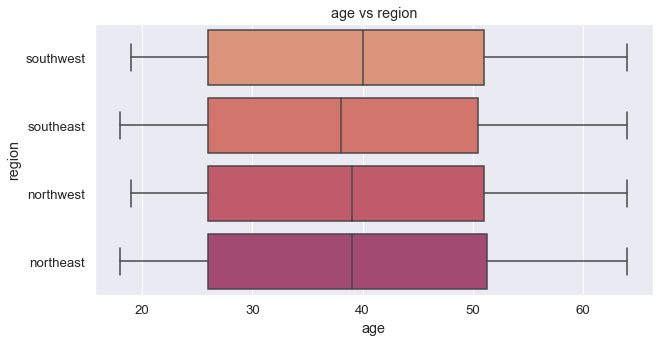

In [56]:
sns.boxplot(data=clean,x='age',y='region')
plt.title("age vs region")
plt.show()

In [57]:
region_age = clean.groupby('region').describe()['age']
display(region_age)

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,296.0,39.070946,14.213804,18.0,26.0,39.0,51.25,64.0
northwest,304.0,39.023026,14.042232,19.0,26.0,39.0,51.00,64.0
southeast,307.0,38.573290,14.189555,18.0,26.0,38.0,50.50,64.0
southwest,291.0,39.381443,13.851262,19.0,26.0,40.0,51.00,64.0


* from graph above we can find that all region have same variation due to ages.
* northeast & southeast are is negetively skewed while othere are positively skewed.
* There are no outliers in all regions. 
* age ranges almost equal.

<a id='multi'></a>
## multivariate Analysis

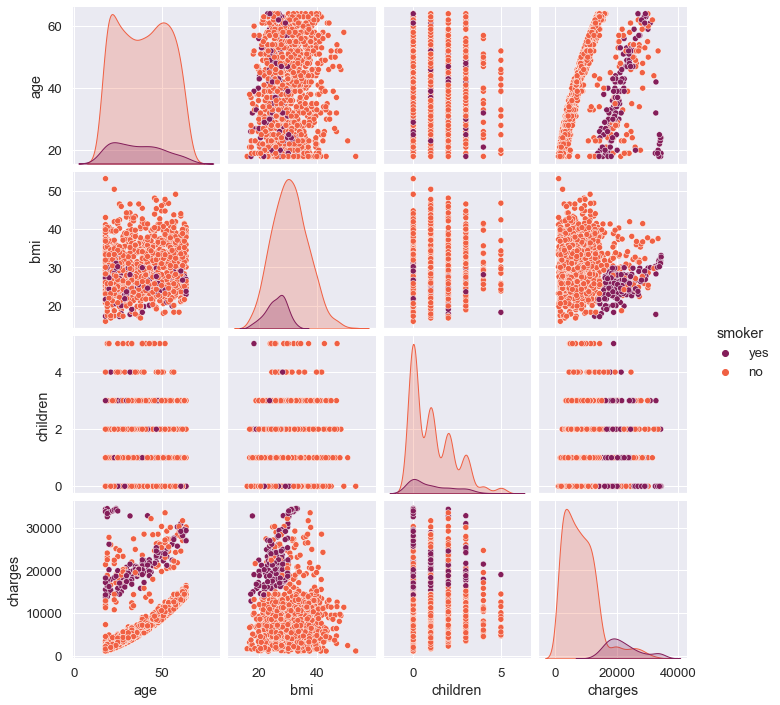

In [58]:
sns.pairplot(clean,hue='smoker',palette='rocket')

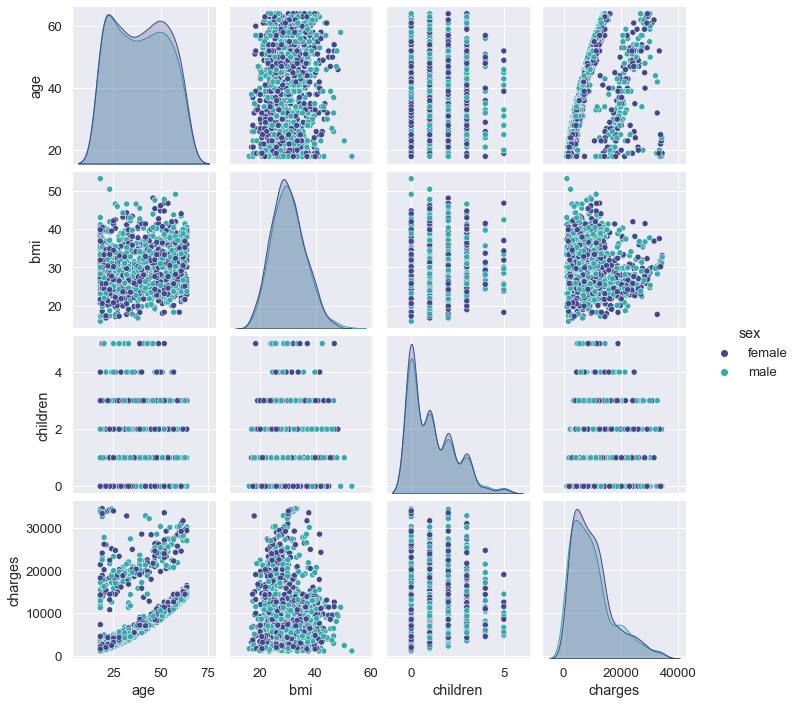

In [59]:
sns.pairplot(clean,hue='sex',palette='mako')

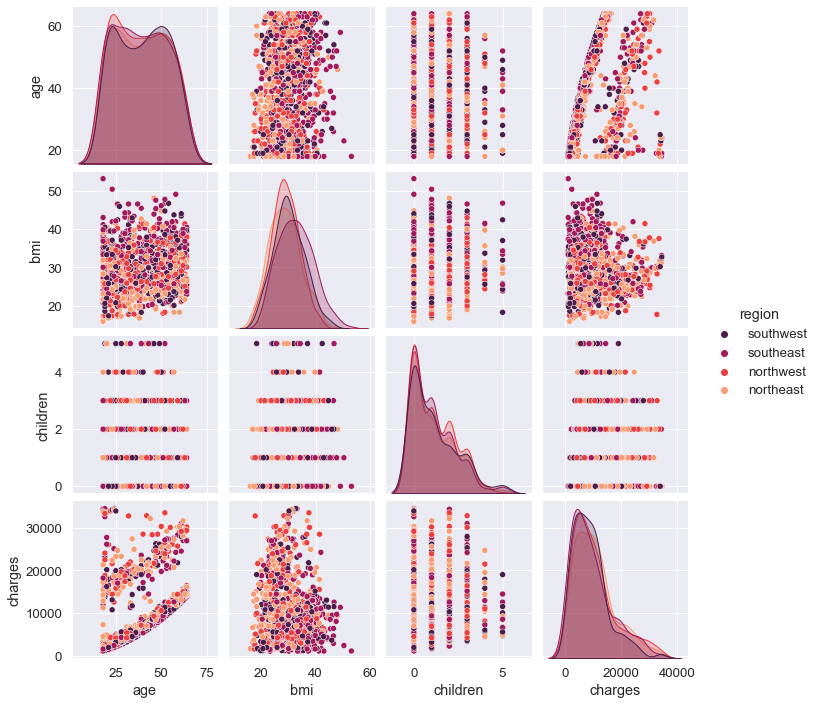

In [60]:
sns.pairplot(clean,hue='region',palette='rocket')

* From above we can find that data is distributed normally due to categories there are no big varaition on distribution as we cleared on qualitative bivariate analysis 

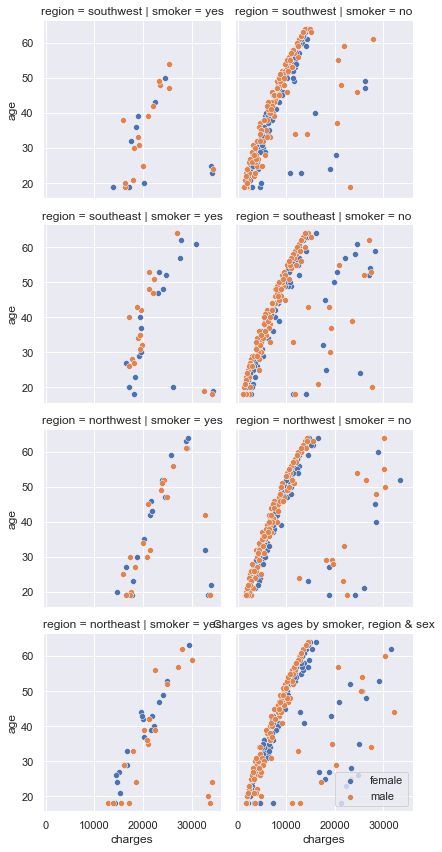

In [61]:
sns.set_theme(rc={'figure.figsize':[8,10]})
g = sns.FacetGrid(clean, col="smoker",  row="region",hue='sex')
g.map(sns.scatterplot, "charges", "age")
plt.title('Charges vs ages by smoker, region & sex')
plt.legend(loc='lower right')
plt.show()

* almost same distribution on both male & female while now we can see a linear correlation between all variables vs charges 
* will go through next steps in order to implies linear regression model.

<a id='mch'></a>
## Machine Learning Engineer

### Deal with categorical variable 
* use one hot encoded to convert categorical variable to nmerical

In [95]:
clean.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [63]:
categ= clean.select_dtypes(include=['O']).columns
categ

Index(['sex', 'smoker', 'region'], dtype='object')

In [64]:
def one_hot(df):
    categ= df.select_dtypes(include=['O']).columns
    clean = pd.get_dummies(df,columns=categ,drop_first=True)
    display(clean.head())
    return clean

In [65]:
clean= one_hot(clean)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### split data into train & test


In [66]:
def x_y(df):
    x= df.drop('charges',axis=1)
    y= df['charges']
    print(x.shape,y.shape)
    return x,y

In [67]:
x,y = x_y(clean)

(1198, 8) (1198,)


In [68]:
def train_test(x,y,test_size=0.33, random_state=42):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=test_size, random_state=random_state)
    print(x_train.size, x_test.size, y_train.size, y_test.size)
    return x_train, x_test, y_train, y_test

In [69]:
x_train, x_test, y_train, y_test = train_test(x,y,test_size=0.33, random_state=42)

6416 3168 802 396


### Feature Scaling
use standard scaler

In [70]:
def standard_scaler(x_train,y_train):
    scaler= StandardScaler()
    scaler.fit(x_train)
    scaled_x_train = scaler.transform(x_train)
    scaled_x_test = scaler.transform(x_test)
    return scaled_x_train,scaled_x_test

In [71]:
scaled_x_train,scaled_x_test = standard_scaler(x_train,y_train)

### Linear Regression model

In [72]:
def linear_model(x_train,x_test,y_train,y_test):
    model = LinearRegression()
    model.fit(scaled_x_train,y_train)
    y_pred_train = model.predict(scaled_x_train)
    y_pred_test = model.predict(scaled_x_test)

    print(f'train_score: {model.score(scaled_x_train,y_train)}')
    print(f'train_score: {model.score(scaled_x_test,y_test)}')
    print("\n")
    print(f"Train R2: {r2_score(y_train, y_pred_train)}")
    print(f"Test R2: {r2_score(y_test, y_pred_test)}")
    print("\n")
    print(f"Train MAE: {mean_absolute_error(y_train, y_pred_train)}")
    print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test)}")
    print("\n")
    print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
    print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")
    return model, y_pred_test

   

In [73]:
model , y_pred_test = linear_model(scaled_x_train,scaled_x_test,y_train,y_test)

train_score: 0.6008851178908763
train_score: 0.6029597970105058


Train R2: 0.6008851178908763
Test R2: 0.6029597970105058


Train MAE: 2550.649303999391
Test MAE: 2611.4538212340453


Train RMSE: 4512.997333058144
Test RMSE: 4670.442496355562


## Another approch 
remove outliers to zero using detect_outliers

In [74]:
clean_detect = df.drop(detect_outliers(df,0,['charges','bmi']))
clean_detect.shape

(1192, 7)

### Deal with categorical variable 
* use one hot encoded to convert categorical variable to nmerical

In [75]:
clean_detect= one_hot(clean_detect)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### split data into train & test


In [76]:
x,y = x_y(clean_detect)

(1192, 8) (1192,)


In [77]:
x_train, x_test, y_train, y_test = train_test(x,y,test_size=0.33, random_state=42)

6384 3152 798 394


### Feature Scaling
use standard scaler

In [78]:
scaled_x_train,scaled_x_test = standard_scaler(x_train,y_train)

### Linear Regression model

In [79]:
model2 , y_pred_test2 = linear_model(scaled_x_train,scaled_x_test,y_train,y_test)

train_score: 0.6045020989340583
train_score: 0.5949956370470171


Train R2: 0.6045020989340583
Test R2: 0.5949956370470171


Train MAE: 2498.5593013293296
Test MAE: 2618.3469413724424


Train RMSE: 4521.437327200393
Test RMSE: 4683.784792235738


* as we see the test R^2 are less on the second approach so we will improve on the first approach  

In [80]:
clean2= clean.copy()
clean2.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<AxesSubplot:xlabel='bmi'>

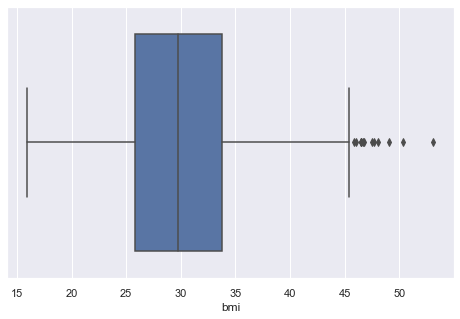

In [81]:
sns.set_theme(rc={'figure.figsize':[8,5]})
sns.boxplot(data=clean2,x='bmi')

<AxesSubplot:xlabel='charges'>

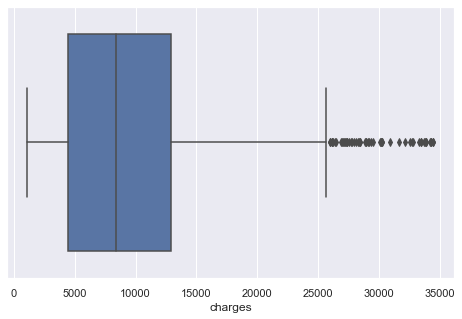

In [82]:
sns.boxplot(data=clean2,x='charges')

In [83]:
features=['bmi','charges']
for col in features:
    idx = detect_outliers(clean2,0,[col])
    clean2.loc[idx,col] = clean2[col].median()

In [84]:
clean2[['bmi','charges']].describe()

,bmi,charges
count,1198.000000,1198.000000
mean,29.899149,8956.646758
std,5.717258,5764.563239
min,15.960000,1121.873900
25%,25.800000,4418.591062
50%,29.735000,8410.900900
75%,33.660000,11946.252600
max,45.430000,25678.778450


<AxesSubplot:xlabel='bmi'>

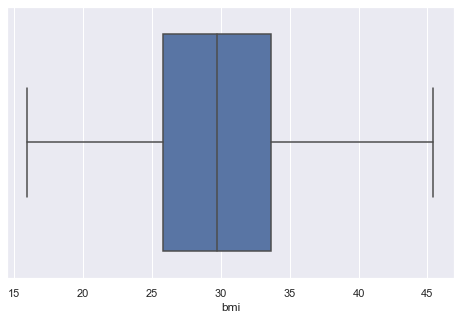

In [85]:
sns.set_theme(rc={'figure.figsize':[8,5]})
sns.boxplot(data=clean2,x='bmi')

<AxesSubplot:xlabel='charges'>

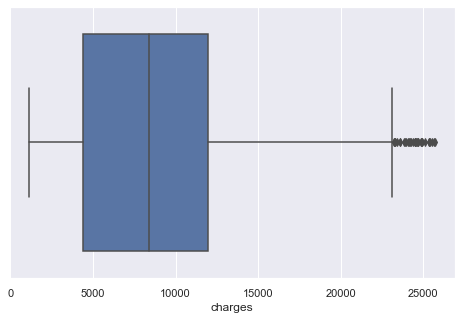

In [86]:
sns.boxplot(data=clean2,x='charges')

### split data into train & test


In [87]:
x,y = x_y(clean2)

(1198, 8) (1198,)


In [88]:
x_train, x_test, y_train, y_test = train_test(x,y,test_size=0.33, random_state=42)

6416 3168 802 396


### Feature Scaling
use standard scaler

In [89]:
scaled_x_train,scaled_x_test = standard_scaler(x_train,y_train)

### Linear Regression model

In [90]:
model3 , y_pred_test3 = linear_model(scaled_x_train,scaled_x_test,y_train,y_test)

train_score: 0.5755944632173058
train_score: 0.5310351421362822


Train R2: 0.5755944632173058
Test R2: 0.5310351421362822


Train MAE: 2070.3960628333175
Test MAE: 2251.1929157131663


Train RMSE: 3694.426088830063
Test RMSE: 4065.2686743064824


As we can see now wehen replaced the outliers in charges & bmi with median we have less R2 the best model was clean the first one with Train R2: 0.60 & Test R2: 0.60

* **Lets us check other models on the first data clean  using:** 
    * 'LR': LinearRegression(),
    * 'SVM': SVR(),
    * 'KNN': KNeighborsRegressor(),
    * 'DT': DecisionTreeRegressor(),
    * 'RF': RandomForestRegressor(),
    * 'XGB': XGBRegressor()

In [91]:
x,y = x_y(clean)

(1198, 8) (1198,)


In [92]:
x_train, x_test, y_train, y_test = train_test(x,y,test_size=0.33, random_state=42)

6416 3168 802 396


In [93]:
models = {
    'LR': LinearRegression(),
    'SVM': SVR(),
    'KNN': KNeighborsRegressor(),
    'DT': DecisionTreeRegressor(),
    'RF': RandomForestRegressor(),
    'XGB': XGBRegressor()
}


for name, model in models.items():
    print(f"Model: {name}")
    print("-"*20)
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    print(f"Train MAE: {mean_absolute_error(y_train, y_pred_train)}")
    print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test)}")
    print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
    print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")
    print(f"Train R2: {r2_score(y_train, y_pred_train)}")
    print(f"Test R2: {r2_score(y_test, y_pred_test)}")
    print("\n")

Model: LR
--------------------
Train MAE: 2550.649303999389
Test MAE: 2611.4538212340426
Train RMSE: 4512.997333058144
Test RMSE: 4670.442496355561
Train R2: 0.6008851178908763
Test R2: 0.6029597970105061


Model: SVM
--------------------
Train MAE: 5285.91934371991
Test MAE: 5685.830441622115
Train RMSE: 7266.155192492022
Test RMSE: 7637.192438054695
Train R2: -0.03461103692132905
Test R2: -0.06166107201741666


Model: KNN
--------------------
Train MAE: 3303.4034729650875
Test MAE: 4408.2982077297975
Train RMSE: 5157.4720950372375
Test RMSE: 6709.573484122749
Train R2: 0.4787554322301244
Test R2: 0.18057680524071518


Model: DT
--------------------
Train MAE: 15.587551807980049
Test MAE: 3082.2047169545453
Train RMSE: 312.140481703273
Test RMSE: 6428.246396397067
Train R2: 0.9980907273090609
Test R2: 0.24785173909891922


Model: RF
--------------------
Train MAE: 945.8632614971759
Test MAE: 2610.1174627116434
Train RMSE: 1790.6497448247856
Test RMSE: 4806.021358413561
Train R2: 0.937

* **Best model wa linear regression on clean dataset with trimmed 5% of the dataset due to outliers on charges**

In [96]:
model , y_pred_test = linear_model(scaled_x_train,scaled_x_test,y_train,y_test)

train_score: 0.6022973355201144
train_score: 0.60297553101467


Train R2: 0.6022973355201144
Test R2: 0.60297553101467


Train MAE: 2553.2241072077936
Test MAE: 2615.804394432714


Train RMSE: 4505.005921954905
Test RMSE: 4670.349954732364


<a id='conc'></a>
## Conclusion
* Model: LR: has a weak linear model with Train R2: 0.60 & Test R2: 0.60 , features has no linear correlation with the response chrages tha's one of the reasons that r2 is weak as we apllied linear regression model on this while no linearity with the response.
* Model: RF, Model: XGB have overfitting problem . 